In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
import dataset as dataset
import datapreparation as datp
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
import copy
import importlib
import GRU as gru

In [2]:
## reload imports
importlib.reload(datp)
importlib.reload(gru)
data = dataset.pianoroll_dataset_batch("C:\DeepLearning\\neural-composer-assignement\datasets\\training\piano_roll_fs5")
print(torch.cuda.is_available())

True


In [3]:
## Initialize Generalist
## Generalist(input_size, hidden_size, num_tags)
model_generalist = gru.Generalist(128, 256, int(data.num_tags()))
model_generalist.optimizer = torch.optim.Adam(model_generalist.parameters())
model_generalist.loss_log = []

In [107]:
## Initialize Specialist
## Specialist(input_size, hidden_size, num_tags)
model_specialist = gru.Specialist(128, 256, int(data.num_tags()))
#model_specialist.cuda()
#model_specialist.optimizer = torch.optim.Adam(model_specialist.parameters())
model_specialist.loss_log = []

In [4]:
## Train the generalist
num_epochs = 1000
## Returns state for transferred training
state = gru.train_sequence(model_generalist, num_epochs, data, model_generalist.optimizer, model_generalist.loss_log)

BCE
Epoch: 0
Epoch loss: 7.8003
Epoch: 1
Epoch loss: 3.5514
Epoch: 3
Epoch loss: 3.5292
Epoch: 5
Epoch loss: 3.5277
Epoch: 7
Epoch loss: 3.5322
Epoch: 8
Epoch loss: 3.5155
Epoch: 11
Epoch loss: 3.5190
Epoch: 12
Epoch loss: 3.5265
Epoch: 13
Epoch loss: 3.5266
Epoch: 14
Epoch loss: 3.5162
Epoch: 15
Epoch loss: 3.5222
Epoch: 16
Epoch loss: 3.5156
Epoch: 17
Epoch loss: 3.5330
Epoch: 18
Epoch loss: 3.5242
Epoch: 19
Epoch loss: 3.5332
Epoch: 20
Epoch loss: 3.5399
Epoch: 21
Epoch loss: 3.5202
Epoch: 22
Epoch loss: 3.5159
Epoch: 23
Epoch loss: 3.5374
Epoch: 24
Epoch loss: 3.5282
Epoch: 25
Epoch loss: 3.5561
Epoch: 26
Epoch loss: 3.5246
Epoch: 27
Epoch loss: 3.5141
Epoch: 45
Epoch loss: 3.5115
Epoch: 47
Epoch loss: 3.5292
Epoch: 48
Epoch loss: 3.5196
Epoch: 49
Epoch loss: 3.5174
Epoch: 50
Epoch loss: 3.4955
Epoch: 55
Epoch loss: 3.4904
Epoch: 57
Epoch loss: 3.4924
Epoch: 58
Epoch loss: 3.4880
Epoch: 61
Epoch loss: 3.4715
Epoch: 63
Epoch loss: 3.4952
Epoch: 64
Epoch loss: 3.4497
Epoch: 67
Epoch 

Epoch loss: 1.5160
Epoch: 543
Epoch loss: 1.5208
Epoch: 544
Epoch loss: 1.5318
Epoch: 545
Epoch loss: 1.5198
Epoch: 546
Epoch loss: 1.4975
Epoch: 559
Epoch loss: 1.4912
Epoch: 561
Epoch loss: 1.4949
Epoch: 562
Epoch loss: 1.4954
Epoch: 563
Epoch loss: 1.4985
Epoch: 564
Epoch loss: 1.4868
Epoch: 569
Epoch loss: 1.4817
Epoch: 571
Epoch loss: 1.4862
Epoch: 572
Epoch loss: 1.5045
Epoch: 573
Epoch loss: 1.4901
Epoch: 574
Epoch loss: 1.4856
Epoch: 575
Epoch loss: 1.4742
Epoch: 581
Epoch loss: 1.4702
Epoch: 583
Epoch loss: 1.4722
Epoch: 584
Epoch loss: 1.4819
Epoch: 585
Epoch loss: 1.4694
Epoch: 589
Epoch loss: 1.4686
Epoch: 591
Epoch loss: 1.4756
Epoch: 592
Epoch loss: 1.4831
Epoch: 593
Epoch loss: 1.4778
Epoch: 594
Epoch loss: 1.4759
Epoch: 595
Epoch loss: 1.4601
Epoch: 601
Epoch loss: 1.4615
Epoch: 602
Epoch loss: 1.4548
Epoch: 605
Epoch loss: 1.4616
Epoch: 606
Epoch loss: 1.4597
Epoch: 607
Epoch loss: 1.4580
Epoch: 608
Epoch loss: 1.4602
Epoch: 609
Epoch loss: 1.4720
Epoch: 610
Epoch loss

Epoch loss: 1.2276
Epoch: 1090
Epoch loss: 1.2293
Epoch: 1091
Epoch loss: 1.2355
Epoch: 1092
Epoch loss: 1.2327
Epoch: 1093
Epoch loss: 1.2281
Epoch: 1094
Epoch loss: 1.2320
Epoch: 1095
Epoch loss: 1.2234
Epoch: 1107
Epoch loss: 1.2204
Epoch: 1109
Epoch loss: 1.2302
Epoch: 1110
Epoch loss: 1.2316
Epoch: 1111
Epoch loss: 1.2320
Epoch: 1112
Epoch loss: 1.2418
Epoch: 1113
Epoch loss: 1.2443
Epoch: 1114
Epoch loss: 1.2267
Epoch: 1115
Epoch loss: 1.2182
Epoch: 1123
Epoch loss: 1.2144
Epoch: 1125
Epoch loss: 1.2144
Epoch: 1126
Epoch loss: 1.2183
Epoch: 1127
Epoch loss: 1.2130
Epoch: 1131
Epoch loss: 1.2100
Epoch: 1133
Epoch loss: 1.2154
Epoch: 1134
Epoch loss: 1.2113
Epoch: 1135
Epoch loss: 1.2029
Epoch: 1139
Epoch loss: 1.2232
Epoch: 1140
Epoch loss: 1.2181
Epoch: 1141
Epoch loss: 1.2096
Epoch: 1142
Epoch loss: 1.2042
Epoch: 1143
Epoch loss: 1.2159
Epoch: 1144
Epoch loss: 1.2176
Epoch: 1145
Epoch loss: 1.2123
Epoch: 1146
Epoch loss: 1.2075
Epoch: 1147
Epoch loss: 1.2156
Epoch: 1148
Epoch lo

Epoch loss: 1.0981
Epoch: 1614
Epoch loss: 1.0911
Epoch: 1627
Epoch loss: 1.0915
Epoch: 1628
Epoch loss: 1.0906
Epoch: 1631
Epoch loss: 1.0894
Epoch: 1633
Epoch loss: 1.0885
Epoch: 1635
Epoch loss: 1.1065
Epoch: 1636
Epoch loss: 1.1131
Epoch: 1637
Epoch loss: 1.1008
Epoch: 1638
Epoch loss: 1.1099
Epoch: 1639
Epoch loss: 1.1102
Epoch: 1640
Epoch loss: 1.0974
Epoch: 1641
Epoch loss: 1.0982
Epoch: 1642
Epoch loss: 1.1070
Epoch: 1643
Epoch loss: 1.0962
Epoch: 1644
Epoch loss: 1.1026
Epoch: 1645
Epoch loss: 1.1058
Epoch: 1646
Epoch loss: 1.1037
Epoch: 1647
Epoch loss: 1.1145
Epoch: 1648
Epoch loss: 1.0985
Epoch: 1649
Epoch loss: 1.0934
Epoch: 1650
Epoch loss: 1.0930
Epoch: 1651
Epoch loss: 1.1098
Epoch: 1652
Epoch loss: 1.0933
Epoch: 1653
Epoch loss: 1.0940
Epoch: 1654
Epoch loss: 1.0856
Epoch: 1675
Epoch loss: 1.0836
Epoch: 1677
Epoch loss: 1.0765
Epoch: 1679
Epoch loss: 1.0788
Epoch: 1680
Epoch loss: 1.0814
Epoch: 1681
Epoch loss: 1.0872
Epoch: 1682
Epoch loss: 1.0875
Epoch: 1683
Epoch lo

In [26]:
## Train the specialist
num_epochs = 100
## Returns state for transferred training
state = gru.train_sequence(model_specialist, num_epochs, data, model_specialist.optimizer, model_specialist.loss_log)


BCE
Previous loss:  0.8508922294713557 in epoch  1469
Epoch: 1469
Epoch loss: 0.6239
Epoch: 1470
Epoch loss: 0.5530
Epoch: 1471
Epoch loss: 0.5127
Epoch: 1472
Epoch loss: 0.4906
Epoch: 1473
Epoch loss: 0.4759
Epoch: 1474
Epoch loss: 0.4712
Epoch: 1475
Epoch loss: 0.4686
Epoch: 1476
Epoch loss: 0.4667
Epoch: 1477
Epoch loss: 0.4627
Epoch: 1478
Epoch loss: 0.4655
Epoch: 1479
Epoch loss: 0.4757
Epoch: 1480
Epoch loss: 0.4854
Epoch: 1481
Epoch loss: 0.4906
Epoch: 1482
Epoch loss: 0.4946
Epoch: 1483
Epoch loss: 0.4952
Epoch: 1484
Epoch loss: 0.4809
Epoch: 1485
Epoch loss: 0.4681
Epoch: 1486
Epoch loss: 0.4571
Epoch: 1487
Epoch loss: 0.4540
Epoch: 1488
Epoch loss: 0.4606
Epoch: 1489
Epoch loss: 0.4608
Epoch: 1490
Epoch loss: 0.4541
Epoch: 1491
Epoch loss: 0.4609
Epoch: 1492
Epoch loss: 0.4756
Epoch: 1493
Epoch loss: 0.4870
Epoch: 1494
Epoch loss: 0.5103
Epoch: 1495
Epoch loss: 0.5229
Epoch: 1496
Epoch loss: 0.5219
Epoch: 1497
Epoch loss: 0.4988
Epoch: 1498
Epoch loss: 0.4648
Epoch: 1499
Epoc

In [8]:
## Save the Generalist state
dir_path = os.path.dirname(os.path.realpath(gru.__file__))
torch.save(state, dir_path+'\\Generalist.pt')

## Current best state 1000 epochs, 256 hidden_size.

In [76]:
## Save the Specialist state
dir_path = os.path.dirname(os.path.realpath(gru.__file__))
torch.save(state, dir_path+'\\Specialist.pt')

## Current best state 1000 epochs, 256 hidden_size.

In [80]:
## Print Generalist state
print('Total number of epochs run: ', len(model_generalist.loss_log))
print('Epoch number of lowest loss: ', model_generalist.loss_log.index(min(model_generalist.loss_log)))
print('Loss for best epoch', min(model_generalist.loss_log))

Total number of epochs run:  1000
Epoch number of lowest loss:  989
Loss for best epoch 1.0233720755204558


In [78]:
## Print Specialist state
print('Total number of epochs run: ', len(model_specialist.loss_log))
print('Epoch number of lowest loss: ', model_specialist.loss_log.index(min(model_specialist.loss_log)))
print('Loss for best epoch', min(model_specialist.loss_log))

Total number of epochs run:  1500
Epoch number of lowest loss:  1469
Loss for best epoch 0.8508922294713557


In [4]:
## Load saved weights into Generalist model
#gru.load(model_generalist, model_generalist.optimizer, filename='Generalist.pt')
model_generalist.optimizer = gru.load(model_generalist, filename='Generalist.pt')
## Additional weight setting with dropout used. Different result, but needs to train longer.
#gru.load(model_generalist, model_generalist.optimizer, filename='GeneralistDropout.pt')
#model_generalist.optimizer = gru.load(model_generalist, filename='GeneralistDropout.pt')

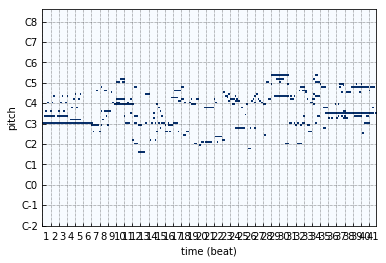

In [5]:
## Generate Generalist music
embed, matrix = gru.gen_music_seconds_smooth(model_generalist, data[0][0] ,composer=0,fs=5,gen_seconds=40,init_seconds=5, device='cpu')


# Export pianoroll as CSV

In [6]:
import numpy
roll = matrix.astype(int)
numpy.savetxt("test.csv", roll, fmt='%i', delimiter=",")

# Convert csv to midi

In [ ]:
roll *= 100
datp.piano_roll_to_mid_file(roll,"test.mid",5,1)

In [108]:
## Load saved weights into Specialist model
model_specialist.optimizer = gru.load(model_specialist, filename='Specialist.pt', device='cuda')
#model_specialist.optimizer = gru.load(model_specialist, filename='Specialist-256-not-shit.pt', device='cuda')

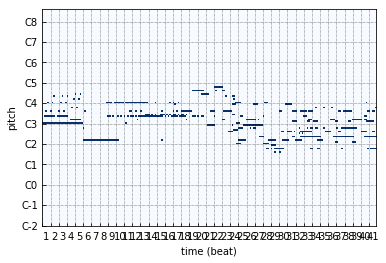

In [112]:
## Generate Specialist music
embed, matrix = gru.gen_music_seconds_smooth(model_specialist, data[0][0] ,composer=0,fs=5,gen_seconds=40,init_seconds=5, device='cpu')
